### COVID-19 Quick Start Notebook  
- If this is your first time using the IBM Functional Genomics Platform SDK, please see our [installation documentation](https://ibm.github.io/omxware-pypi-docs/build/html/installation.html) and [Getting Started Notebook](https://github.com/IBM/omxware-getting-started/blob/master/GettingStarted.ipynb) or [Getting Started Documentation](https://ibm.github.io/omxware-pypi-docs/build/html/usage.html). 
- If you have any questions, please feel free to reach out to us via our forums http://ibm.biz/functional-genomics-forum.

**Verify Python 3**

In [1]:
import sys

if sys.version_info[0] < 3:
    raise "Must be using Python 3"
else:
    print("Alrite! We are using Python "+str(sys.version_info[0]))

Alrite! We are using Python 3


**Install or Update the OMXWare Package (if needed)**

In [2]:
# !echo 'y' | pip uninstall omxware

# #Install OMXWare client
# !pip install --no-cache-dir omxware

# #Install PrettyPrint
# !pip install --no-cache-dir pprint

# #Install py4j to use Dynamic forms
# !pip install --no-cache-dir py4j

# #Install panda
# !pip install --no-cache-dir pandas

In [3]:
!pip show omxware

Name: omxware
Version: 0.1.38
Summary: IBM Functional Genomics Platform SDK to explore data.
Home-page: https://github.ibm.com/GrandChallenge-Almaden/omxware-pypi
Author: Harsha Krishnareddy
Author-email: hvkrishn@us.ibm.com
License: IBM
Location: /home/vader/Projects/python3_env/lib/python3.7/site-packages
Requires: configparser, simplejson, python-keycloak, pycrypto, pprint, pandas, urllib3, IPython, requests, matplotlib
Required-by: 


**Import OMXWare and initialize**

In [4]:
%matplotlib inline

import json
import pprint
import math
pp = pprint.PrettyPrinter(indent=4)

from IPython.display import display

import omxware

# --- Authentication options --- #
# generate token with OMXWare user name and password (likely done once and then stored in file, see usage below)
token = omxware.get_token('username', 'password') # fill in password to initiate token

# or

# use previously generated token loaded from file
# token_path = "./omxware_collaborative_work/super_awesome_token"  # update for your path to the token file you create
# f = open(token_path)
# token = f.readline()


# provide your token to authenticate
omx = omxware.omxware(token)


**Access OMXWare Help**

In [5]:
help(omx)

Help on omxware in module omxware.omxware object:

class omxware(builtins.object)
 |  omxware(omxware_token, env='public')
 |  
 |  Methods defined here:
 |  
 |  __init__(self, omxware_token, env='public')
 |      Initialize a session.
 |      
 |      Parameters:
 |          :param omxware_token: OMXWare Token. use
 |          :type omxware_token: str
 |      
 |          :param env: OMXWare `env` type. Must be one of ['master', 'dev', 'dev_search', 'local']
 |          :type env: str
 |  
 |  domains(self, ids=None, sequence=None, genus_names=None, protein_ids=None, go_terms=None, ipr_ids=None, sequence_length=None, classification=None, collection=None, page_size=25, page_number=1)
 |      Get OMXWare Domains.
 |      
 |      Parameters:
 |      
 |          :param ids: List of domain ids
 |          :type ids: [str]
 |      
 |          :param sequence: Domain sequence
 |          :type sequence: str
 |      
 |          :param genus_names: List of Genus names
 |          :type ge

**Search for Details About a Specific Gene Sequence**  
- Since the IBM Functional Genomics Platform has pre-computed millions of genes, proteins, etc. and stored all of the unique sequences, we can access the data with a simple retrieval to see if a sequence already exists. If that sequence exists, you can then just connect out to other related biological entities e.g. query a gene then find the relevant domains for its protein sequences.  
- If you're interested in a fuzzy search, this can be accomplished by retrieving sequences of interest and using your aligner/classifier of choice. Those sequences of interest can be retrieved as a dataframe, JSON, or FASTA format.
- Alternatively, you can complete a fuzzy search using our [BLAST application](http://ibm.biz/functional-genomics-blast)

In [6]:
search_term = "ATGATCGAGATACAACACCTTAACCTGACGTTTGGCGAGGGCGAGAAGCGTAATCAGGTGCTGGACGATGTGAATATCAGCGTGAGGGAGGGGGAGATTTACGGCCTGGTGGGGGAGTCCGGTTCGGGCAAAACCACGGTGCTGAAATGCCTTGCCGGGCTGTTTACCCACTGGGAGGGCGAGCTGGCGATTAACGGCAAGCGGCTGGAAAAACGTATCAGCCAGGAACGCTGCCGCCGGGTGCAGATGGTATTTCAGGATCCGTACGGCTCTTTGCATCCGCGTCACACCATCGGCGATATTCTGGAAGAGCCGCTGCACATTCACCGCATAAAAGATCGGGAGCGGCGCGTTCACGCCCTGCTGGATAAAGTTGGGCTTAATCGGGCGTTTCGCGATCGCTATCCGCACCAGCTTTCCGGCGGGCAGCGCCAGCGCGTGGCGATTGCCAGGGCGCTGATTCTGGAGCCGCAGGTGCTGCTGCTGGATGAACCTACCTCGGCGCTGGACGTCTCGGTGCAGGCGGAAATCCTCAACCTGCTGGCGGAACTTCAGCGTGAGTCGAACCTGACCTACCTGATGGTCACCCACGATCTGGGCGTGATTGCCCATCTGTGTCAGAAGGTGGCGGTAATGCAGTATGGCAAAATCCTTGAAAGCCTGACGGTGGACGAACTGGTCGCCGGGCAGGCCAAAACCGACTATACGCGGATGCTGGTCAATGCCTCACAGCAGTATTCCCGCGAGATGGCGCGGGAGGTGGCGGTGTATTAG"

genes = omx.genes(sequence = search_term,page_size=25)
#search for sequence is an exact string search and is case insensitive

total_results = genes.total_results()
#search will only return one result since we are looking for a specific sequence

print('Total Number of Results: %d' % total_results)

for each_gene in genes.results():
    print('Gene Name:',each_gene.name())
    print('Gene UID:',each_gene.id())
    genomes = each_gene.genomes()
    print('Number of Genomes this sequence is found in:',genomes.total_results())

Total Number of Results: 1
Gene Name: Oligopeptide transport ATP-binding protein OppF
Gene UID: 000002b370e57ecc5b92dec8cae249cf
Number of Genomes this sequence is found in: 2


**Search for Details About a Specific Gene By Name**
- Here we provide an example of how to search a gene name to a specific classification of data e.g. bacteria, virus, or all as well as layering on a limitation to data only associated with SARS-CoV-2

In [7]:
search_term = 'Spike Glycoprotein'

genes_bacteria = omx.genes(gene_name=search_term, page_size=25,classification='bacteria')
#default classification is 'bacteria'

genes_virus = omx.genes(gene_name=search_term, page_size=25,classification='virus')
genes_all = omx.genes(gene_name=search_term, page_size=25,classification='all')
genes_sars_cov2 = omx.genes(gene_name=search_term,page_size=25,collection=['covid19'],classification='virus')
# search is case insensitive and will match partial strings

print('Total Unique Sequences for (Bacteria) %s: %d' % (search_term, genes_bacteria.total_results()))
print('Total Unique Sequences for (Virus) %s: %d' % (search_term, genes_virus.total_results()))
print('Total Unique Sequences for (All) %s: %d' % (search_term, genes_all.total_results()))
print('Total Unique Sequences for (SARS-COV-2) %s: %d' % (search_term, genes_sars_cov2.total_results()))

Total Unique Sequences for (Bacteria) Spike Glycoprotein: 0
Total Unique Sequences for (Virus) Spike Glycoprotein: 1954
Total Unique Sequences for (All) Spike Glycoprotein: 1954
Total Unique Sequences for (SARS-COV-2) Spike Glycoprotein: 1855


**Getting all Results for a query**

In [8]:
search_term = 'Spike Glycoprotein'
genes_sars_cov2 = omx.genes(gene_name=search_term,page_size=100,collection=['covid19'],classification='virus')
total = genes_sars_cov2.total_results()
print('Total Number of Results should be:',total)
pages = math.ceil(total/100)
print('Total Number of Pages to be queried:',pages)
final_results = []
list_uid = []
for counter in range(1,pages+1):
    results = omx.genes(gene_name=search_term,page_size=100,collection=['covid19'],classification='virus',page_number=counter)
    results = results.results(type='list')
    for item in results:
        final_results.append(item)
        list_uid.append(item.id())
print('Total Final Results:',len(final_results))
print('Total Final Unique Results:',len(set(final_results)))
print('Total Gene UID returned:',len(list_uid))
print('Total Unique Gene UID returned:',len(set(list_uid)))

Total Number of Results should be: 1855
Total Number of Pages to be queried: 19
Total Final Results: 1855
Total Final Unique Results: 1855
Total Gene UID returned: 1855
Total Unique Gene UID returned: 1855


**Get results in a dataframe** *to get results in other formats, see: https://github.com/IBM/omxware-getting-started/blob/master/RetrieveDataFormats.ipynb*

In [9]:
genes_virus_df = genes_virus.results(type='df')
genes_virus_df.head()

,id,name,type,genera,genomes,sequence_length,status,omx_creation_ts,omx_modified_ts,classification,collection
0,fa1843a54d80b8edd6b37c5dac4ad502,Spike glycoprotein,gene,[betacoronavirus],[EPI_ISL_419922],3822,active,2020-04-06T17:27:28.000Z,2020-04-06T17:27:28.000Z,[virus],"[sars cov 2, sars-cov-2, sars cov2, covid-19, ..."
1,8c37bba6ade474a2d02ff568d567a99b,Spike glycoprotein,gene,[betacoronavirus],[EPI_ISL_417290],3822,active,2020-03-28T00:47:38.000Z,2020-03-28T00:47:38.000Z,[virus],"[sars cov 2, sars-cov-2, sars cov2, covid-19, ..."
2,e6e0f4517d1bf61145b23a066b95937b,Spike glycoprotein,gene,[betacoronavirus],[EPI_ISL_414587],3822,active,2020-03-15T22:17:00.000Z,2020-03-15T22:17:00.000Z,[virus],"[sars cov 2, sars-cov-2, sars cov2, covid-19, ..."
3,aec9d7e635befcc4b6664a00b4c606da,Spike glycoprotein,gene,[betacoronavirus],[EPI_ISL_427554],3822,active,2020-05-12T08:23:13.000Z,2020-05-12T08:23:13.000Z,[virus],"[sars cov 2, sars-cov-2, sars cov2, covid-19, ..."
4,06e094fd9b4e2bde7a4629cfa7f957f3,Spike glycoprotein,gene,[alphacoronavirus],[GCA_001503155.1],4164,active,2020-03-14T01:10:20.000Z,2020-03-14T01:10:20.000Z,[virus],NaN


**Get distribution of genes across genera**

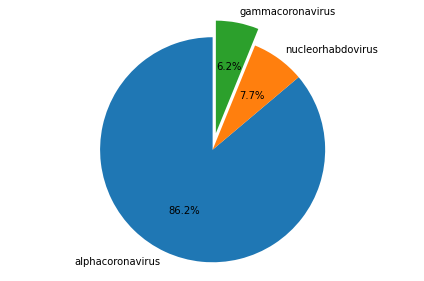

In [10]:
genes_all.show_facets(name = 'genera',topN=3)

**Retrieve Additional Gene Data (e.g. Sequence) from OMXWare as Object**

In [11]:
gene_list = genes_virus.results(type='list')

# By default, the API returns a `list`
print("Returns: List of {} objects \nResults: {}\n".format(genes.type(), genes.total_results()) )
    
gene = gene_list[0]
print("Id  \t\t=> " + gene.id())
print("Name   \t\t=> " + gene.name())
print("Sequence   \t=> " + gene.sequence()[:100] + "...")
print("Sequence length => " + str(gene.sequence_length()))

print("\n\n JSON:")
print(gene.json())



Returns: List of gene objects 
Results: 1

Id  		=> fa1843a54d80b8edd6b37c5dac4ad502
Name   		=> Spike glycoprotein
Sequence   	=> ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGAACTCAATTACCCCCTGCATACACTAATTCTTTCACAC...
Sequence length => 3822


 JSON:
{'id': 'fa1843a54d80b8edd6b37c5dac4ad502', 'name': 'Spike glycoprotein', 'type': 'gene', 'genera': ['betacoronavirus'], 'genomes': ['EPI_ISL_419922'], 'sequence_length': 3822, 'status': 'active', 'omx_creation_ts': '2020-04-06T17:27:28.000Z', 'omx_modified_ts': '2020-04-06T17:27:28.000Z', 'classification': ['virus'], 'collection': ['sars cov 2', 'sars-cov-2', 'sars cov2', 'covid-19', 'covid19', 'covid 19', 'coronavirus', 'corona virus']}


**Search for Details About a Specific Protein from SARS-COV-2 genomes**

In [12]:
search_term = 'Replicase polyprotein 1a'
proteins = omx.proteins(protein_name=search_term,page_size=25,classification='virus',collection = ['sars-cov-2'])
#default classification is bacteria, so when searching for sars-cov-2 results, classification must be specified as 'virus' and specify collection as covid19

print('Total Results for %s: %d' % (search_term, proteins.total_results()))

Total Results for Replicase polyprotein 1a: 2429


**Get results in a dataframe** to get results in other formats, see: https://github.com/IBM/omxware-getting-started/blob/master/RetrieveDataFormats.ipynb

In [13]:
proteins_df = proteins.results(type='df')
proteins_df.head()

,id,name,type,genomes,sequence_length,status,omx_creation_ts,omx_modified_ts,classification,collection
0,cd6eb514a5328cbc03c04613e3ad1a0d,Replicase polyprotein 1a,protein,[EPI_ISL_427718],4321,active,2020-05-12T00:46:12.000Z,2020-05-12T00:46:12.000Z,[virus],"[sars cov 2, sars-cov-2, sars cov2, covid-19, ..."
1,1c519f8ec9eb28929e159d5d943e4b7e,Replicase polyprotein 1a,protein,[EPI_ISL_435704],4405,active,2020-05-12T07:12:41.000Z,2020-05-12T07:12:41.000Z,[virus],"[sars cov 2, sars-cov-2, sars cov2, covid-19, ..."
2,d0b165d4db4c40a99887cea5a78780e8,Replicase polyprotein 1a,protein,[EPI_ISL_435691],4405,active,2020-05-12T00:10:24.000Z,2020-05-12T00:10:24.000Z,[virus],"[sars cov 2, sars-cov-2, sars cov2, covid-19, ..."
3,6e140b8d42a5c0ea1c34fc2e40c91cd3,Replicase polyprotein 1a,protein,"[EPI_ISL_414545, EPI_ISL_414549, EPI_ISL_41455...",4405,active,2020-03-15T19:23:42.000Z,2020-03-15T22:43:46.000Z,[virus],"[sars cov 2, sars-cov-2, sars cov2, covid-19, ..."
4,14e429110f579351156edca2d360722d,Replicase polyprotein 1a,protein,[EPI_ISL_429521],4405,active,2020-05-12T07:16:48.000Z,2020-05-12T07:16:48.000Z,[virus],"[sars cov 2, sars-cov-2, sars cov2, covid-19, ..."


**Retrieve Protein Data from OMXWare as Object**

In [14]:
protein_list = proteins.results(type='list')

# By default, the API returns a `list`
print("Returns: List of {} objects \nResults: {}\n".format(proteins.type(), proteins.total_results()) )
    
protein = protein_list[0]
print("Id  \t\t=> " + protein.id())
print("Name   \t\t=> " + protein.name())
print("Sequence   \t=> " + protein.sequence()[:100] + "...")
print("Sequence length => " + str(protein.sequence_length()))

print("\n\n JSON:")
print(protein.json())

Returns: List of protein objects 
Results: 2429

Id  		=> cd6eb514a5328cbc03c04613e3ad1a0d
Name   		=> Replicase polyprotein 1a
Sequence   	=> MVELVAELEGIQYGRSGETLGVLVPHVGEIPVAYRKVLLRKNGNKGAGGHSYGADLKSFDLGDELGTDPYEDFQENWNTKHSSGVTRELMRELNGGAYTR...
Sequence length => 4321


 JSON:
{'id': 'cd6eb514a5328cbc03c04613e3ad1a0d', 'name': 'Replicase polyprotein 1a', 'type': 'protein', 'genomes': ['EPI_ISL_427718'], 'sequence_length': 4321, 'status': 'active', 'omx_creation_ts': '2020-05-12T00:46:12.000Z', 'omx_modified_ts': '2020-05-12T00:46:12.000Z', 'classification': ['virus'], 'collection': ['sars cov 2', 'sars-cov-2', 'sars cov2', 'covid-19', 'covid19', 'covid 19', 'coronavirus', 'corona virus']}


**Get IPR codes for Protein**

In [15]:
protein_ipr = protein.ipr()
print("Total IPR codes on protein %s are: %d" % (protein.id(),protein_ipr.total_results()))
protein_ipr_list = protein_ipr.results(type='list')
list_ipr_codes = []
for each_ipr in protein_ipr_list:
    list_ipr_codes.append(each_ipr.id())
print("IPR Codes on Protein:",list_ipr_codes)

Total IPR codes on protein cd6eb514a5328cbc03c04613e3ad1a0d are: 28
IPR Codes on Protein: ['IPR008740', 'IPR014828', 'IPR014829', 'IPR014822', 'IPR032592', 'IPR021590', 'IPR024375', 'IPR002589', 'IPR009003', 'IPR024358', 'IPR038030', 'IPR022733', 'IPR038083', 'IPR038166', 'IPR037230', 'IPR038400', 'IPR032505', 'IPR036333', 'IPR038123', 'IPR037204', 'IPR013016', 'IPR036499', 'IPR018995']


**Get Domains for Protein**

In [ ]:
protein_domains = protein.domains()
print("Total Domains on protein %s are: %d" % (protein.id(),protein_domains.total_results()))
protein_domains_list = protein_domains.results(type='list')
list_domains_uid = []
for each_domain in protein_domains_list:
    list_domains_uid.append(each_domain.id())
print("Domains on Protein:",list_domains_uid)